# Statistical Thinking in Python (Part 2)

---

***Pensamiento estadístico en Python (Parte 2)*** 

---

Después de completar Pensamiento estadístico en Python (Parte 1), tiene la mentalidad probabilística y las habilidades fundamentales de estadísticas de piratas informáticos para sumergirse en conjuntos de datos y extraer información útil de ellos. En este curso, hará precisamente eso, expandiendo y perfeccionando su caja de herramientas de estadísticas de piratas informáticos para realizar las dos tareas clave en la inferencia estadística, la estimación de parámetros y la prueba de hipótesis. Trabajará con conjuntos de datos reales a medida que aprenda, culminando con el análisis de las medidas de los picos de los famosos pinzones de Darwin. Saldrá de este curso con nuevos conocimientos y mucha práctica en su haber, listo para atacar sus propios problemas de inferencia en el mundo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### GENERAL

In [2]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,len(x)+1) / n

    return x, y

In [4]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

In [5]:
fertility= np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

In [27]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

## 1) Parameter estimation by optimization
**_Estimación de parámetros por optimización_**

Al hacer inferencia estadística, hablamos el lenguaje de la probabilidad. Una distribución de probabilidad que describe sus datos tiene parámetros. Por lo tanto, un objetivo principal de la inferencia estadística es estimar los valores de estos parámetros, lo que nos permite describir de manera concisa e inequívoca nuestros datos y sacar conclusiones de ellos. En este capítulo, aprenderá a encontrar los parámetros óptimos, los que mejor describen sus datos.

### Optimal parameters

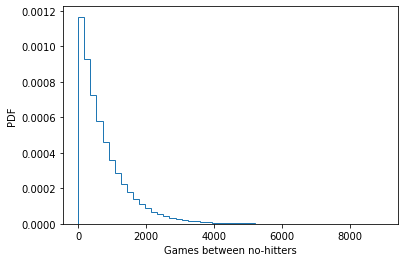

In [6]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step') #normed=True
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

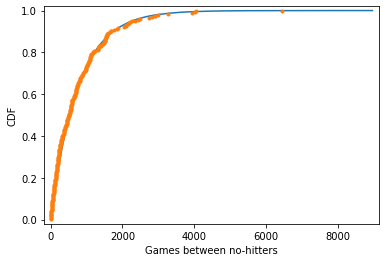

In [7]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

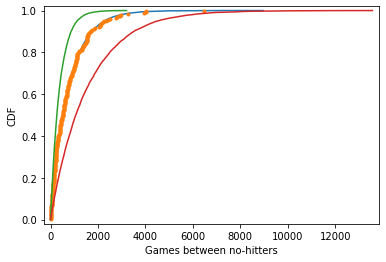

In [8]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

¡Buen trabajo! Observe cómo el valor de tau dado por la media coincide mejor con los datos. De esta forma, tau es un parámetro óptimo.

### Linear regression by least squares


In [9]:
female_literacy_fertility=pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/22.%20Statistical%20Thinking%20in%20Python%20(Part%202)/dataset/female_literacy_fertility.csv')

In [10]:
female_literacy_fertility.head(3)

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"


In [11]:
illiteracy=female_literacy_fertility['female literacy']
fertility=female_literacy_fertility['fertility']

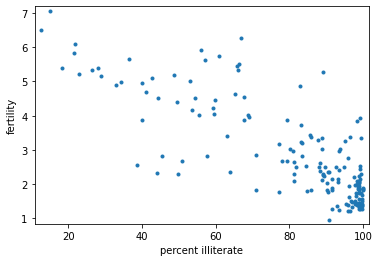

-0.8041324026815341


In [12]:
# Plot the illiteracy rate versus fertility
_ = plt.plot( illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.867905419699977 children per woman


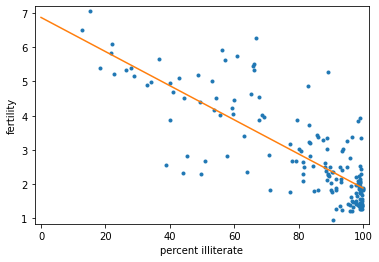

In [13]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

La función np.polyfit () que usó para obtener sus parámetros de regresión encuentra la pendiente y la intersección óptimas. Está optimizando la suma de los cuadrados de los residuos, también conocida como RSS (para la suma de cuadrados de los residuos).

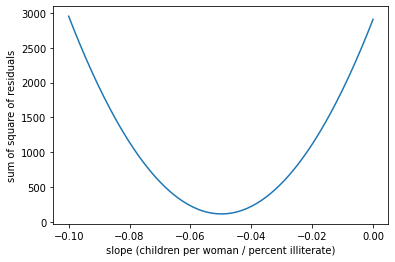

In [14]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, -0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


¡Buen trabajo! Observe que el mínimo en la gráfica, que es el valor de la pendiente que da la suma mínima del cuadrado de los residuos, es el mismo valor que obtuvo al realizar la regresión.

### The importance of EDA: Anscombe's quartet


In [15]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,4.82,  5.68])

0.5000909090909094 3.000090909090908


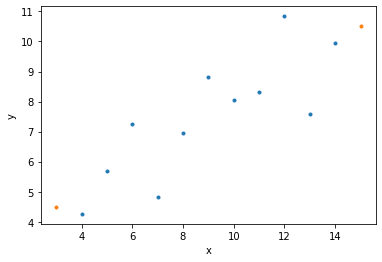

In [16]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = x_theor * a + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [17]:
anscombe_x = np.array([np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])])
anscombe_y = np.array([np.array([8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])])

In [18]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.0009090909090905
slope: 0.49972727272727313 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.0017272727272735


## 2) Bootstrap confidence intervals
**_Intervalos de confianza de bootstrap_**

"Levantarse con sus propias manos" es un modismo clásico que significa que logras una tarea difícil por ti mismo sin ninguna ayuda. En inferencia estadística, desea saber qué pasaría si pudiera repetir la adquisición de datos un número infinito de veces. Esta tarea es imposible, pero ¿podemos usar solo los datos que realmente tenemos para acercarnos al mismo resultado como una infinidad de experimentos? ¡La respuesta es sí! La técnica para hacerlo se llama apropiadamente bootstrapping. Este capítulo le presentará esta herramienta extraordinariamente poderosa.

**Bootstrapping** 

```
Es el uso de datos muestreados para realizar inferencia estadistica
```

Conjunto de datos repetidas con reemplazo



In [19]:
np.random.choice([1,2,3,4,5], size=5)

array([4, 5, 4, 1, 3])

### Generating bootstrap replicates

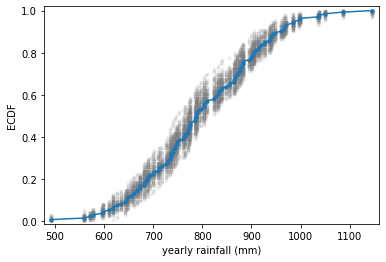

In [28]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap confidence intervals

In [31]:
# GENERAR UN MUESTRA DE ARRANQUE !!!!!!!!!!!!
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [32]:
# Funcion que genera muchas réplicas de arranque a partir del conjunto de datos
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

La desviación estándar de esta distribución, llamada error estándar de la media, o SEM.


```
standard error of the mean = np.std(data) / np.sqrt(len(data))
```



10.510549150506188
10.600719697947216


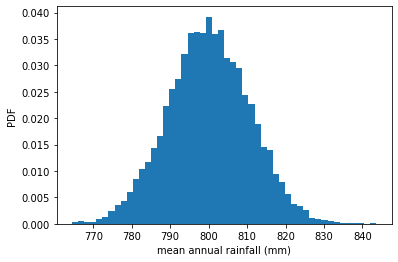

In [36]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [38]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([779.35381579, 820.66360902])

95% confidence interval = [115.12142002 180.15423167] games


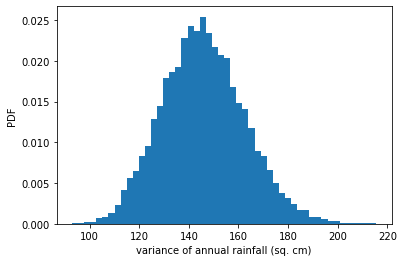

In [41]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates /100

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games') # Print the confidence interval

# Make a histogram of the results
_ = plt.hist(bs_replicates, density=True, bins=50) # normed=True
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
# bs_replicates = draw_bs_reps(nohitter_times,np.mean,10000)

# # Compute the 95% confidence interval: conf_int
# conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# # Print the confidence interval
# print('95% confidence interval =', conf_int, 'games')

# # Plot the histogram of the replicates
# _ = plt.hist(bs_replicates, bins=50, normed=True)
# _ = plt.xlabel(r'$\tau$ (games)')
# _ = plt.ylabel('PDF')

# # Show the plot
# plt.show()

# Esto le da una estimación de cuál es el tiempo típico
#   entre juegos sin hits. Podría ser entre 660 y 870 juegos.

### Pairs bootstrap

In [42]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[-0.05572168 -0.04438882]


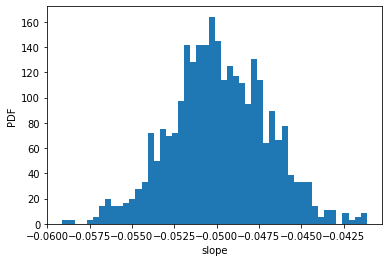

In [44]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True) #normed
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

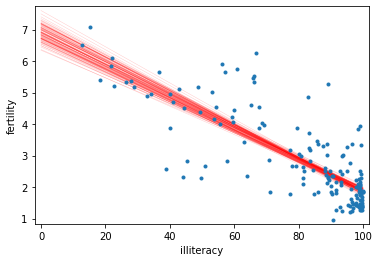

In [45]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## 3) Introduction to hypothesis testing
**_Introducción a la prueba de hipótesis_**

Ahora sabe cómo definir y estimar parámetros dado un modelo. Pero la pregunta sigue siendo: ¿qué tan razonable es observar sus datos si un modelo es verdadero? Esta pregunta se aborda mediante pruebas de hipótesis. Son la guinda del pastel de inferencia. Después de completar este capítulo, podrá construir y probar hipótesis cuidadosamente utilizando estadísticas de piratas informáticos.

## 4) Hypothesis test examples
**_Ejemplos de prueba de hipótesis_**

Como vio en el último capítulo, la prueba de hipótesis puede ser un poco complicada. Debe definir la hipótesis nula, averiguar cómo simularla y definir claramente qué significa ser "más extremo" para calcular el valor p. Como cualquier habilidad, la práctica hace al maestro, y este capítulo le brinda una buena práctica con las pruebas de hipótesis.

## 5) Putting it all together: a case study
**_Poniéndolo todo junto: un estudio de caso_**

Todos los años, durante los últimos 40 años, Peter y Rosemary Grant han ido a la isla de Daphne Major, en Galápagos, y han recopilado datos sobre los pinzones de Darwin. Usando sus habilidades en inferencia estadística, pasará este capítulo con sus datos y será testigo de primera mano, a través de los datos, de la evolución en acción. ¡Es una forma emocionante de terminar el curso!